In [150]:
#import all required modules, including alpaca-trade-api to obtain historical stock and bond values.
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [118]:
load_dotenv()

True

In [149]:
#average monthly income for credit union members can be modified for individual investors
monthly_income = 12000

In [152]:
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [153]:
#using Python Requests library to obtain current prices of cryptocurrencies
response_btc = requests.get(btc_url).json()

In [14]:
print(json.dumps(response_btc, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 18918237,
            "id": 1,
            "last_updated": 1641159746,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 893413269087,
                    "percent_change_1h": 0.502310891045744,
                    "percent_change_24h": -0.590347720850314,
                    "percent_change_7d": -6.76867608373107,
                    "percentage_change_1h": 0.502310891045744,
                    "percentage_change_24h": -0.590347720850314,
                    "percentage_change_7d": -6.76867608373107,
                    "price": 47234.0,
                    "volume_24h": 18082148024
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18918237,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [154]:
response_eth = requests.get(eth_url).json()

In [16]:
print(json.dumps(response_eth, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 118998334,
            "id": 1027,
            "last_updated": 1641159857,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 454546130919,
                    "percent_change_1h": 0.472994548492115,
                    "percent_change_24h": 1.69204167231837,
                    "percent_change_7d": -6.96379408425308,
                    "percentage_change_1h": 0.472994548492115,
                    "percentage_change_24h": 1.69204167231837,
                    "percentage_change_7d": -6.96379408425308,
                    "price": 3824.32,
                    "volume_24h": 10014080931
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 118998334,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

In [155]:
#accessing current price for Bitcoin from JSON response object
btc_price = response_btc['data']['1']['quotes']['USD']['price']

In [28]:
print(f"The price for Bitcoin is ${btc_price}.")

The price for Bitcoin is $47234.0.


In [156]:
#accessing current price for Ethereum from JSON response object
eth_price = response_eth['data']['1027']['quotes']['USD']['price']

In [27]:
print(f"The price for Ethereum is ${eth_price}.")

The price for Ethereum is $3824.32.


In [157]:
#current value of cryptocurrency holdings
total_crypto_wallet = btc_price + eth_price

In [25]:
print(f"The current balance in your cryptocurrency wallet is ${total_crypto_wallet}.")

The current balance in your cryptocurrency wallet is $51058.32.


In [158]:
#set current holdings in SPDR S&P 500 ETF Trust (ticker:SPY) and iShares Core US Aggregate Bond ETF (ticker:AGG)
spy_shares = 110
agg_shares = 200

In [159]:
#access alpaca keys from .env file
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_api_key)
type(alpaca_secret_key)

str

In [160]:
#Creating Alpace tradeapi.REST object using Alpaca SDK
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [161]:
#parameters for Alpaca API call using 2021-12-29
tickers = ["SPY", "AGG"]
timeframe = "1D"
fts='2021-12-29T09:45:00-04:00'
tts = '2021-12-29T09:45:00-04:00'

In [162]:
#Using Alpaca get_barset function to retrieve current closing prices for AGG and SPY funds, formatted as Pandas DataFrame.
ETF_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=fts,
    end=tts
).df

In [163]:
ETF_prices_df.head()

AGG                                   SPY  \
                             open    high     low   close   volume open   
time                                                                      
2021-12-29 00:00:00-05:00  113.99  114.05  113.81  113.87  5712959  477   

                                                             
                             high     low   close    volume  
time                                                         
2021-12-29 00:00:00-05:00  478.56  475.92  477.46  47223213

In [164]:
ETF_prices_df

AGG                                   SPY  \
                             open    high     low   close   volume open   
time                                                                      
2021-12-29 00:00:00-05:00  113.99  114.05  113.81  113.87  5712959  477   

                                                             
                             high     low   close    volume  
time                                                         
2021-12-29 00:00:00-05:00  478.56  475.92  477.46  47223213

In [165]:
#changing datatype to float
AGG_price = float(ETF_prices_df["AGG"]["close"])
SPY_price = float(ETF_prices_df["SPY"]["close"])

In [166]:
#calculating current value of bond portfolio
agg_value = AGG_price * agg_shares

In [167]:
print(f"The current value of the bond portfolio is ${agg_value: .2f}.")

The current value of the bond portfolio is $ 22774.00.


In [168]:
#calculating current value of stock portfolio
spy_value = SPY_price * spy_shares

In [169]:
print(f"The current value of the stock portfolio is ${spy_value: .2f}.")

The current value of the stock portfolio is $ 52520.60.


In [170]:
#adding current values for stock and bond portfolios
total_stocks_bonds = agg_value + spy_value

In [141]:
print(f"The current balance of the stock and bond portfolios is ${total_stocks_bonds: .2f}.")

The current balance of the stock and bond portfolios is $ 75294.60.


In [171]:
#adding valuations of cryptocurrency wallet and stock and bond portfolios
total_portfolio = total_stocks_bonds + total_crypto_wallet

In [172]:
print(f"The total portfolio value is ${total_portfolio: .2f}.")

The total portfolio value is $ 120732.52.


In [173]:
savings_data = [total_crypto_wallet, total_stocks_bonds]

In [174]:
savings_data

[45437.92, 75294.6]

In [175]:
#creating DataFrame for cryptocurrency and stock/bond portfolios
savings_df = pd.DataFrame(savings_data, index=['crypto', 'stock_bond'], columns=['amount'])

In [176]:
savings_df

,amount
crypto,45437.92
stock_bond,75294.60


Text(0.5, 1.0, 'Pie chart showing distribution of investments between crypto and stocks and bonds')

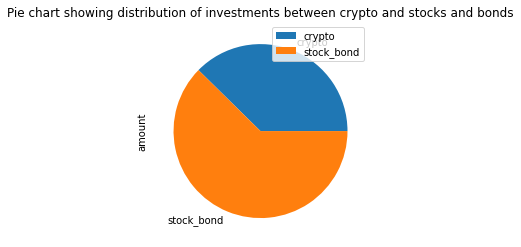

In [315]:
#plotting pie chart to display composition of portfolio
ax = savings_df.plot(kind="pie", y="amount")
ax.set_title('Pie chart showing distribution of investments between crypto and stocks and bonds')

In [179]:
#emergency fund value set to 3 x monthly income
emergency_fund_value = monthly_income * 3

In [180]:
#if statements to assess whether total portfolio is sufficient for emergency fund
if total_portfolio > emergency_fund_value:
    print('Congratulations! You have enough money saved to set aside an emergency fund.'),
elif total_portfolio == emergency_fund_value:
    print('Congratulations! You have reached an important financial goal.'),
else:
    print(f"You are ${emergency_fund_value - total_portfolio} from reaching this important financial goal.")

Congratulations! You have enough money saved to set aside an emergency fund.


In [316]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_api_key)
type(alpaca_secret_key)

str

In [317]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [318]:
tickers = ["SPY", "AGG"]
timeframe = "1D"
fts='2018-05-08T09:45:00-04:00'
tts = '2021-05-08T09:45:00-04:00'
print(fts)

2018-05-08T09:45:00-04:00


In [319]:
#Alpaca API call for 3 years of historical closing prices 
portfolio_split_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = fts,
    end = tts
).df

In [211]:
display(portfolio_split_df.head())

AGG                                         SPY  \
                             open      high     low    close   volume    open   
time                                                                            
2018-12-13 00:00:00-05:00  105.59  105.6500  105.53  105.535  4859560  266.52   
2018-12-14 00:00:00-05:00  105.68  105.6800  105.56  105.560  5271384  262.96   
2018-12-17 00:00:00-05:00  105.66  105.7800  105.61  105.750  6643780  259.40   
2018-12-18 00:00:00-05:00  105.63  105.8400  105.63  105.820  6444906  257.20   
2018-12-19 00:00:00-05:00  105.88  106.1699  105.79  105.950  7177745  255.17   

                                                                 
                               high      low   close     volume  
time                                                             
2018-12-13 00:00:00-05:00  267.4900  264.120  265.41   85184961  
2018-12-14 00:00:00-05:00  265.5126  259.850  260.50  102862203  
2018-12-17 00:00:00-05:00  260.6800  253.525  255.10  144021435  
2018-12-18 00:00:00-05:00  257.9500  253.280  255.12  119045611  
2018-12-19 00:00:00-05:00  259.4000  249.350  251.19  195780833

In [186]:
display(portfolio_split_df.tail())

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-12-22 00:00:00-05:00  114.33  114.35  114.17  114.34  5736004  462.79   
2021-12-23 00:00:00-05:00  114.29  114.31  114.07  114.19  5304915  468.75   
2021-12-27 00:00:00-05:00  114.15  114.30  114.13  114.27  5069840  472.03   
2021-12-28 00:00:00-05:00  114.43  114.45  114.17  114.22  4892072  477.72   
2021-12-29 00:00:00-05:00  113.99  114.05  113.81  113.87  5712959  477.00   

                                                             
                             high     low   close    volume  
time                                                         
2021-12-22 00:00:00-05:00  467.81  462.58  467.69  50038091  
2021-12-23 00:00:00-05:00  472.19  468.64  470.58  47149529  
2021-12-27 00:00:00-05:00  477.31  472.01  477.27  46260198  
2021-12-28 00:00:00-05:00  478.81  476.06  476.89  37370466  
2021-12-29 00:00:00-05:00  478.56  475.92  477.46  47223213

In [212]:
portfolio_split_df.describe()

AGG                                                    \
             open        high         low       close        volume   
count  100.000000  100.000000  100.000000  100.000000  1.000000e+02   
mean   107.359350  107.485381  107.212602  107.371353  4.371853e+06   
std      0.934059    0.930624    0.962833    0.939308  2.163242e+06   
min    105.590000  105.650000  105.530000  105.535000  1.560565e+06   
25%    106.610000  106.738750  106.467575  106.611250  2.581908e+06   
50%    107.280000  107.395000  107.180000  107.315000  3.642385e+06   
75%    108.252500  108.335000  108.192500  108.260000  5.701763e+06   
max    109.060000  109.180000  108.960000  109.070000  1.139411e+07   

              SPY                                                    
             open        high         low       close        volume  
count  100.000000  100.000000  100.000000  100.000000  1.000000e+02  
mean   273.866963  275.315995  272.049573  274.009704  7.427551e+07  
std     14.507188   13.775041   15.342012   14.493371  3.640131e+07  
min    235.970000  240.835500  233.760000  234.410000  2.692951e+07  
25%    263.787500  264.730000  261.607500  263.257500  5.259238e+07  
50%    277.960000  279.040000  276.905000  278.465000  6.353129e+07  
75%    286.225000  286.537250  285.255000  286.115000  8.076510e+07  
max    294.720000  294.950000  293.410000  294.020000  2.215642e+08

In [213]:
#Monte Carlo simulation of 500 samples spanning 30 years for 60:40 split between stock and bond portfolios
MC_thirtyyear = MCSimulation(
  portfolio_data = portfolio_split_df,
  weights = [.40,.60],
  num_simulation = 500,
  num_trading_days = 252*30
)

In [214]:
MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open      high     low    close   volume   
time                                                                    
2018-12-13 00:00:00-05:00  105.59  105.6500  105.53  105.535  4859560   
2018-12-14 00:00:00-05:00  105.68  105.6800  105.56  105.560  5271384   
2018-12-17 00:00:00-05:00  105.66  105.7800  105.61  105.750  6643780   
2018-12-18 00:00:00-05:00  105.63  105.8400  105.63  105.820  6444906   
2018-12-19 00:00:00-05:00  105.88  106.1699  105.79  105.950  7177745   

                                           SPY                             \
                          daily_return    open      high      low   close   
time                                                                        
2018-12-13 00:00:00-05:00          NaN  266.52  267.4900  264.120  265.41   
2018-12-14 00:00:00-05:00     0.000237  262.96  265.5126  259.850  260.50   
2018-12-17 00:00:00-05:00     0.001800  259.40  260.6800  253.525  255.10   
2018-12-18 00:00:00-05:00     0.000662  257.20  257.9500  253.280  255.12   
2018-12-19 00:00:00-05:00     0.001229  255.17  259.4000  249.350  251.19   

                                                   
                              volume daily_return  
time                                               
2018-12-13 00:00:00-05:00   85184961          NaN  
2018-12-14 00:00:00-05:00  102862203    -0.018500  
2018-12-17 00:00:00-05:00  144021435    -0.020729  
2018-12-18 00:00:00-05:00  119045611     0.000078  
2018-12-19 00:00:00-05:00  195780833    -0.015405

In [216]:
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/Hockenbery/fintech/Python_Project/Challenge-5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008777,1.007362,0.993668,1.005839,1.010055,0.990304,0.993968,1.000109,1.014195,0.995079,...,1.007278,0.997735,1.002738,1.000321,0.995957,1.002490,1.001660,1.006317,0.996891,1.002246
2,1.014673,1.016664,0.987931,1.009913,1.009344,1.005794,0.990994,1.007586,1.017023,0.989000,...,1.001597,0.999214,1.002547,1.001665,1.004294,0.995324,1.004809,1.006220,0.989994,1.010081
3,1.016793,1.024189,0.978149,1.009671,1.010791,1.008494,0.989788,1.001469,1.018384,0.991808,...,1.012637,1.013550,0.999840,1.003057,1.010995,0.987158,1.015827,1.009023,0.984942,1.016208
4,1.008166,1.021126,0.988111,1.011751,1.014099,0.999183,0.983377,1.002134,1.021977,0.994380,...,1.014126,1.006902,1.003815,0.992123,1.008758,0.980670,1.000468,1.003731,0.978683,1.018875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,85.301650,64.328012,74.692268,154.347293,39.650387,56.335132,141.405088,121.072028,52.774960,76.162856,...,78.933800,75.085183,218.545290,191.690777,109.932211,177.768676,96.187172,314.382543,42.715828,105.256985
7557,85.302081,64.113380,74.717973,153.841872,39.629550,56.435671,141.293218,121.058344,52.974105,75.951230,...,78.598729,74.879116,219.542864,191.376416,110.621331,178.456376,96.260191,313.026513,42.961275,105.190851
7558,84.867496,64.677040,75.083022,154.706744,39.483687,56.138800,141.176050,121.912315,52.907759,75.663114,...,78.890055,75.282393,220.180218,191.151671,109.880231,178.409429,96.293523,315.044525,43.307372,106.708950
7559,84.895034,64.490165,75.247434,154.548560,39.629721,55.572111,141.052522,121.192485,53.012846,75.522169,...,79.131505,75.703791,220.601834,191.787834,110.504471,180.500221,95.911855,317.123069,43.275227,106.884802


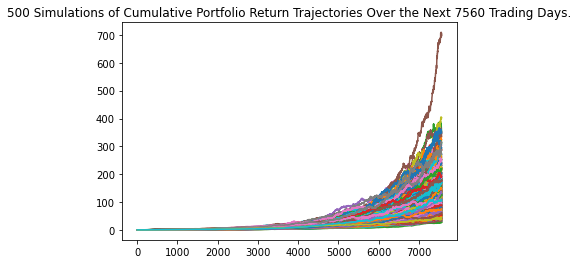

In [217]:
#generating overlay line plot of Monte Carlo simulation
MC_sim_line_plot = MC_thirtyyear.plot_simulation()

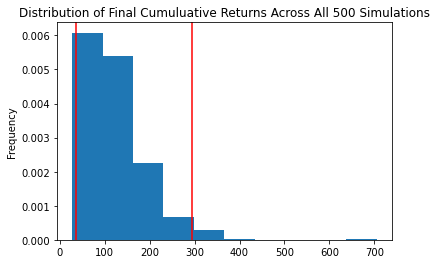

In [218]:
#plotting probability distribution of Monte Carlo simulation
MC_sim_dist_plot = MC_thirtyyear.plot_distribution()

In [219]:
#summary statistics for 30 year Monte Carlo simulation
MC_summary_statistics = MC_thirtyyear.summarize_cumulative_return()

In [220]:
print(MC_summary_statistics)

count           500.000000
mean            121.720158
std              69.840266
min              27.279196
25%              73.804403
50%             106.987799
75%             153.333034
max             704.988479
95% CI Lower     35.918466
95% CI Upper    293.823343
Name: 7560, dtype: float64


In [302]:
ci_95_lower_cumulative_return = MC_summary_statistics[8] * 75295
print(ci_95_lower_cumulative_return)
ci_95_upper_cumulative_return = MC_summary_statistics[9] * 75295
print(ci_95_upper_cumulative_return)

2704480.911420655
22123428.646831878


In [303]:
print(f"There is a 95% chance that an initial investment of $75,295 in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_95_lower_cumulative_return: .2f} and ${ci_95_upper_cumulative_return: .2f}.")

There is a 95% chance that an initial investment of $75,295 in the portfolio over the next 30 years will end within the range of $ 2704480.91 and $ 22123428.65.


In [304]:
#Parameters for Monte Carlo simulation over 10 years with 80:20 split between stocks and bonds
MC_tenyear = MCSimulation(
  portfolio_data = portfolio_split_df,
  weights = [.20,.80],
  num_simulation = 500,
  num_trading_days = 252*10
)

In [305]:
MC_tenyear.portfolio_data.head()

AGG                                      \
                             open      high     low    close   volume   
time                                                                    
2018-12-13 00:00:00-05:00  105.59  105.6500  105.53  105.535  4859560   
2018-12-14 00:00:00-05:00  105.68  105.6800  105.56  105.560  5271384   
2018-12-17 00:00:00-05:00  105.66  105.7800  105.61  105.750  6643780   
2018-12-18 00:00:00-05:00  105.63  105.8400  105.63  105.820  6444906   
2018-12-19 00:00:00-05:00  105.88  106.1699  105.79  105.950  7177745   

                                           SPY                             \
                          daily_return    open      high      low   close   
time                                                                        
2018-12-13 00:00:00-05:00          NaN  266.52  267.4900  264.120  265.41   
2018-12-14 00:00:00-05:00     0.000237  262.96  265.5126  259.850  260.50   
2018-12-17 00:00:00-05:00     0.001800  259.40  260.6800  253.525  255.10   
2018-12-18 00:00:00-05:00     0.000662  257.20  257.9500  253.280  255.12   
2018-12-19 00:00:00-05:00     0.001229  255.17  259.4000  249.350  251.19   

                                                   
                              volume daily_return  
time                                               
2018-12-13 00:00:00-05:00   85184961          NaN  
2018-12-14 00:00:00-05:00  102862203    -0.018500  
2018-12-17 00:00:00-05:00  144021435    -0.020729  
2018-12-18 00:00:00-05:00  119045611     0.000078  
2018-12-19 00:00:00-05:00  195780833    -0.015405

In [306]:
#Running Monte Carlo simulation
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/Hockenbery/fintech/Python_Project/Challenge-5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000284,1.010401,1.020912,1.000956,1.000656,1.008167,1.004647,1.007021,1.002291,1.001547,...,1.008287,1.013249,0.996360,0.988450,1.013350,1.009339,1.001733,0.994461,1.001736,0.992593
2,1.001198,1.013653,1.016776,1.008980,0.989743,1.012483,1.014165,1.013052,1.004368,1.010074,...,1.013691,1.018280,0.996101,0.984389,1.027759,1.004259,1.008764,1.010057,1.003760,0.972139
3,1.005607,1.003433,1.014643,1.014517,1.018155,1.022043,1.012049,1.022728,1.005074,1.011351,...,1.021677,1.025520,0.997369,0.987393,1.026582,1.017753,1.012369,1.002940,1.013709,0.985053
4,1.010836,1.008334,1.033647,0.991268,1.020847,1.022241,1.012567,1.036356,1.018220,1.007475,...,1.026399,1.023972,0.999356,0.975827,1.022737,1.019038,1.019781,1.007017,1.013395,0.975474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.749112,5.049739,5.109855,6.796121,3.133181,8.441213,7.158105,2.540517,3.586579,6.402753,...,5.269195,5.219878,2.867703,5.099584,7.492711,5.598576,5.245519,6.149704,5.965223,3.773834
2517,4.803830,5.019367,5.101893,6.842158,3.066704,8.498356,7.176793,2.548775,3.587425,6.393401,...,5.253068,5.161001,2.928195,5.158033,7.469240,5.587086,5.203652,6.128997,5.936353,3.812954
2518,4.826645,4.994945,5.207424,6.842553,3.073562,8.486468,7.192950,2.573430,3.597381,6.496597,...,5.285586,5.137294,2.949177,5.111373,7.438818,5.580944,5.149536,6.174423,5.946315,3.860467
2519,4.854795,4.955724,5.210965,6.846400,3.069926,8.512623,7.129007,2.569272,3.587405,6.545055,...,5.226890,5.150236,2.947062,5.123834,7.420158,5.583954,5.128583,6.187864,5.992602,3.848833


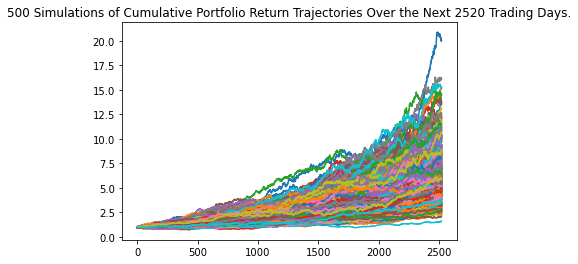

In [310]:
#Overlay line plot for 10 year Monte Carlo simulation
MC_sim_line_plot2 = MC_tenyear.plot_simulation()

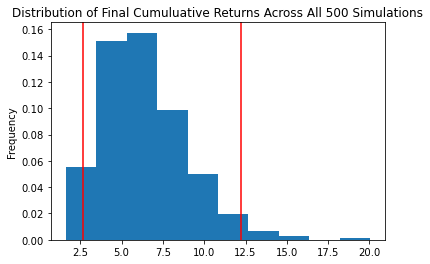

In [311]:
#probability distribution of 10 year Monte Carlo simulation
MC_sim_dist_plot2 = MC_tenyear.plot_distribution()

In [312]:
#summary statistics for 10 year Monte Carlo simulation
MC_summary_statistics2 = MC_tenyear.summarize_cumulative_return()

In [313]:
print(MC_summary_statistics2)

count           500.000000
mean              6.427246
std               2.538680
min               1.619059
25%               4.644934
50%               6.111298
75%               7.709276
max              20.045695
95% CI Lower      2.659154
95% CI Upper     12.227359
Name: 2520, dtype: float64


In [314]:
ci_95_lower_cumulative_return2 = MC_summary_statistics2[8] * 75295
print(ci_95_lower_cumulative_return2)
ci_95_upper_cumulative_return2 = MC_summary_statistics2[9] * 75295
print(ci_95_upper_cumulative_return2)

200221.00665313916
920658.9739665827


In [ ]:

A commonly used estimate of retirement annual income is 80% of pre-retirement annual income, which may vary depending
on factors such as continuing mortgage costs and lifestyle. Social security on average replaces 40% of pre-retirement
income. In this example, pre-retirement annual income is 12 x $12,000 = $144,000, 80% of pre-retirement annual income 
is $115,200, and 40% of pre-retirement annual income is $57,600. A starting point to estimating the amount of retirement
savings required to provide the required retirement annual income is the 4% rule, or annual income required x 25. In this
example, $57,600 x 25 = $1,440,000. The 30 year Monte Carlo simulation predicts upper and lower bounds of a 95% confidence 
interval of $ 22,123,428.65 and $2,704,480.91, thus a very high likelihood of having sufficient funds to retire. The 10 
year Monte Carlo simulation with the portfolio weighted more heavily toward stocks predicts upper and lower bounds of a 95%
confidence interval of $920,658.97 and $200,221.00. Thus, there is a low likelihood that this credit union member will have 
sufficient funds to retire in 10 years. As seen in the graph of cumulative returns over 30 years, most of the growth in value 
occurs between 10 and 30 years of holding this portfolio. It should be noted that this investor's holdings of cryptocurrencies
may also appreciate significantly in value over time.
